In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
movies = pd.read_csv('./ml-latest-small/movies.csv')

In [67]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv')

In [68]:
df = pd.merge(movies,ratings,on='movieId')

<AxesSubplot:>

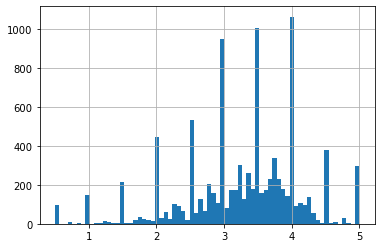

In [69]:
df.groupby('title')['rating'].mean().hist(bins=70)

In [70]:
df['title'] = df['title'].apply(lambda x: x.split("(")[0])

In [71]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint,Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5,1537110021


In [72]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Faster                         5.0
Get Low                        5.0
Sorority House Massacre II     5.0
What Men Talk About            5.0
Sorority House Massacre        5.0
Ghost Graduation               5.0
Sonatine                       5.0
Son of the Bride               5.0
Girls About Town               5.0
Go for Zucker!                 5.0
Name: rating, dtype: float64

In [73]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [74]:
num_of_rating = pd.DataFrame(df.groupby('title')['rating'].count())

In [75]:
dataset = pd.merge(rating,num_of_rating,on='title')

In [76]:
dataset.rename(columns={'rating_x':'rating','rating_y':'num of rating'},inplace=True)

In [77]:
dataset['num of rating'].sort_values(ascending=False).head(10)

title
Forrest Gump                           329
Shawshank Redemption, The              317
Pulp Fiction                           307
Silence of the Lambs, The              279
Matrix, The                            278
Star Wars: Episode IV - A New Hope     251
Jurassic Park                          238
Braveheart                             237
Terminator 2: Judgment Day             224
Schindler's List                       220
Name: num of rating, dtype: int64

<AxesSubplot:>

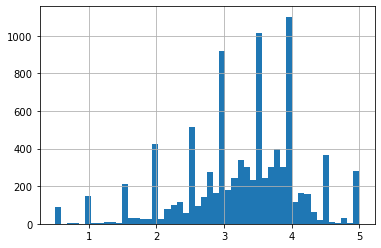

In [78]:
dataset['rating'].hist(bins=50)

<AxesSubplot:>

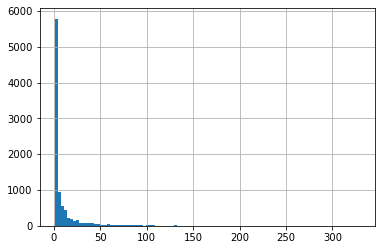

In [79]:
dataset['num of rating'].hist(bins=100)

In [94]:
dataset.sort_values('num of rating',ascending=False)

,rating,num of rating
title,,
Forrest Gump,4.164134,329
"Shawshank Redemption, The",4.429022,317
Pulp Fiction,4.197068,307
"Silence of the Lambs, The",4.161290,279
"Matrix, The",4.192446,278
...,...,...
Salmon Fishing in the Yemen,1.500000,1
Branded to Kill,5.000000,1
Brake,2.000000,1


In [80]:
matrix = pd.pivot_table(index='userId',columns='title',values='rating',data=df)

In [105]:
matrix['Forrest Gump '].count()

329

In [106]:
matrix

title,,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [120]:
matrix

Index(['', ''71 ', ''Hellboy': The Seeds of Creation ', ''Round Midnight ',
       ''Salem's Lot ', ''Til There Was You ', ''Tis the Season for Love ',
       ''burbs, The ', ''night Mother ', '*batteries not included ',
       ...
       'Zulu ', '[REC] ', '[REC]² ', '[REC]³ 3 Génesis ',
       'anohana: The Flower We Saw That Day - The Movie ', 'eXistenZ ', 'xXx ',
       'xXx: State of the Union ', '¡Three Amigos! ', 'À nous la liberté '],
      dtype='object', name='title', length=9397)

In [121]:
movie_name = "xXx: State of the Union "
current_movie_rating = matrix[movie_name]

In [122]:
current_movie_rating

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    NaN
609    NaN
610    1.5
Name: xXx: State of the Union , Length: 610, dtype: float64

In [123]:
similar_ratings = matrix.corrwith(current_movie_rating,axis=0)

/home/arpan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/arpan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [124]:
similar_to_current_movie = pd.DataFrame(similar_ratings,columns = ['correlation'])

In [125]:
similar_to_current_movie.sort_values('correlation',ascending=False).head(10)

,correlation
title,
,1.0
American Beauty,1.0
Austin Powers: The Spy Who Shagged Me,1.0
Bad Boys,1.0
Coyote Ugly,1.0
Crocodile Dundee,1.0
Dr. Dolittle,1.0
Eight Below,1.0
Free Willy,1.0
